<a href="https://colab.research.google.com/github/Vitor-shift/tste_ED01/blob/main/facenet_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepface

In [ ]:
from deepface import DeepFace

25-05-12 23:58:20 - Directory /root/.deepface has been created
25-05-12 23:58:20 - Directory /root/.deepface/weights has been created


In [ ]:
from PIL import Image

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='suafoto.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)

 # Convert the image to RGB mode
  img = Image.open(filename).convert('RGB')
  img.save(filename)
  return filename

In [ ]:
take_photo()

<IPython.core.display.Javascript object>

'suafoto.jpg'

In [ ]:
emb = DeepFace.represent(img_path = "suafoto.jpg", model_name = 'Facenet')

In [ ]:
len(emb)

1

In [ ]:
emb[0]

{'embedding': [-0.3444824516773224,
  0.3957308530807495,
  1.1916395425796509,
  -0.5949933528900146,
  -0.06057170033454895,
  -0.2755972146987915,
  0.6691650152206421,
  0.78949373960495,
  1.199083924293518,
  1.5521435737609863,
  -1.787296175956726,
  0.1690875142812729,
  -1.1313554048538208,
  0.6233354806900024,
  -0.8923656940460205,
  -0.8250806927680969,
  -1.9628963470458984,
  -0.9626147747039795,
  -1.3179712295532227,
  -1.1844661235809326,
  0.7339369058609009,
  -1.074603796005249,
  -0.915801465511322,
  -0.8999994993209839,
  -2.680684804916382,
  0.8732487559318542,
  -0.6657688617706299,
  -0.6124828457832336,
  0.04938749223947525,
  1.042906641960144,
  0.27802640199661255,
  0.63856041431427,
  0.47814053297042847,
  -1.9650886058807373,
  1.220073938369751,
  -0.969035804271698,
  -2.018221139907837,
  0.640932023525238,
  0.7077299952507019,
  0.8216730356216431,
  -0.6868153810501099,
  0.32834339141845703,
  -0.3908195197582245,
  0.10912209749221802,
  -0

In [ ]:
len(emb[0]['embedding'])

128

In [ ]:
faces = DeepFace.extract_faces(img_path = "suafoto.jpg")

In [ ]:
from PIL import Image
img = Image.open("suafoto.jpg")  # Load the original image
faces_list = []
for face in faces:
    x, y, w, h = face['facial_area']['x'], face['facial_area']['y'], face['facial_area']['w'], face['facial_area']['h']
    face_patch = img.crop((x, y, x + w, y + h))
    faces_list.append(face_patch)

In [ ]:
len(faces_list)

1

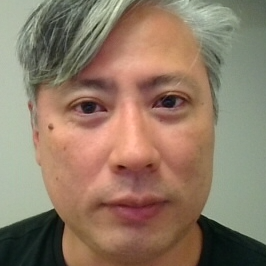

In [ ]:
faces_list[0]

In [ ]:
faces_list[1]

IndexError: list index out of range

In [ ]:
faces_list[0].save("face1.jpg")

OSError: cannot write mode RGBA as JPEG

In [ ]:
emb = DeepFace.represent(img_path = "face1.jpg", model_name = 'Facenet')

In [ ]:
len(emb[0]['embedding'])

128

In [ ]:
!pip install requests

In [ ]:
import requests

In [ ]:
api_url = "https://localhost:8000/buscar?lat=40&lon=40"
payload = {"key1": "value1", "key2": "value2"}
response = requests.post(api_url) # Use json= for sending JSON data

if response.status_code == 200:
    print("Success!")
else:
    print("Error:", response.status_code)

ConnectionError: HTTPSConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /buscar?lat=40&lon=40 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7a7842d53a50>: Failed to establish a new connection: [Errno 111] Connection refused'))